# 3. Running with only PyTorch for comparison

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset

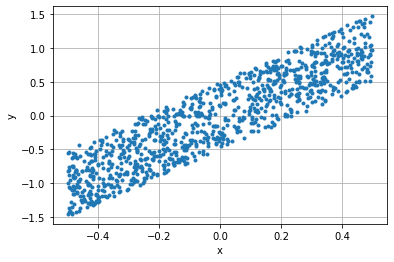

In [2]:
# Create a linear function with noise as our data
nsamples = 1000
ref_slope = 2.0
ref_offset = 0.0
noise = np.random.random((nsamples, 1)) - 0.5    # -0.5 to center the noise
x_train = np.random.random((nsamples, 1)) - 0.5  # -0.5 to center x around 0
y_train = ref_slope * x_train + ref_offset + noise

plt.plot(x_train, y_train, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [3]:
torch_ds = TensorDataset(torch.from_numpy(x_train).float(), torch.from_numpy(y_train).float())
torch_loader = DataLoader(torch_ds, batch_size=128)

In [5]:
%%time
device = 0
for epoch in range(100):
    for batch in torch_loader:
        x_train, y_train = batch
        x_train = x_train.to(device)
        y_train = y_train.to(device)

CPU times: user 2.11 s, sys: 585 ms, total: 2.69 s
Wall time: 2.7 s
